# Exploring the Relationship Between Unemployment and Inflation in Italy

In this notebook, we investigate how unemployment and inflation rates in Italy have changed over time and whether their relationship aligns with the Phillips curve theory (which posits an inverse link between these two economic variables). Our analysis covers data from the late 2000s to 2024, capturing periods of economic expansion, recession, and more recent global events.

---

## 1. Introduction and Motivation

### Background

- **Phillips Curve Theory**: Suggests an inverse relationship between unemployment (x-axis) and inflation (y-axis).
- **Macroeconomic Context**:  
  - Periods with **lower unemployment** are often associated with **higher inflation** due to increased consumer demand and wage pressures.  
  - Conversely, higher unemployment usually corresponds to lower inflation as consumer demand weakens.
- **Italian Economic Context**: Italy has undergone various economic challenges, including the sovereign debt crisis in early 2010s and the global disruptions around 2020–2022. We want to see if these events are reflected in the data and how they may have affected the unemployment-inflation dynamic.

### Objectives

1. **Time Series Analysis**: Inspect how unemployment and inflation have each evolved over the years.  
2. **Relationship Analysis**: Determine whether a strong inverse relationship exists between the two variables and whether any periods deviate significantly from classical theory.  
3. **Interpretation**: Draw conclusions about the current Italian economic climate and the validity of the Phillips curve in this dataset.

---

## 2. Data Description and Preprocessing

Our final dataset (`italy_unemployment_inflation.csv`) has already been cleaned and merged using scripts in the `scripts/` directory:
- **`data_merging.py`** handles downloading/reading the raw CSVs, renaming columns, dropping missing values, and merging by date.
- After running those scripts, the ready-to-analyze dataset is placed under `data/processed/`.

```python
import pandas as pd

# Load the processed dataset
df = pd.read_csv("../data/processed/italy_unemployment_inflation.csv", parse_dates=['Date'])

print("Data Preview:")
df.head()

In [7]:
import pandas as pd

# Load the processed dataset
df = pd.read_csv("../data/processed/italy_unemployment_inflation.csv", parse_dates=['date'])
print("Merged and Cleaned Data:")
print(df.head())

Merged and Cleaned Data:
        date  Inflation  Unemployment
0 2010-01-01   1.306823           8.5
1 2010-02-01   1.150882           8.6
2 2010-03-01   1.370061           8.6
3 2010-04-01   1.552742           8.7
4 2010-05-01   1.387531           8.7


### Data Columns
- Date: Monthly or quarterly timestamps from around 2009–2024.
- Unemployment: The percentage of the labor force that is jobless.
- Inflation: Year-over-year change in consumer prices, measured as a percentage.

### 3. Exploratory Data Analysis (EDA)
#### 3.1 Descriptive Statistics
We begin by computing basic descriptive statistics to check the distributions and range of unemployment and inflation.

In [9]:
# Display summary statistics
df.describe()

,date,Inflation,Unemployment
count,179,179.000000,179.000000
mean,2017-06-01 02:24:48.268156416,1.894304,10.007263
min,2010-01-01 00:00:00,-0.580813,5.700000
25%,2013-09-16 00:00:00,0.324458,8.400000
50%,2017-06-01 00:00:00,1.132818,10.200000
75%,2021-02-15 00:00:00,2.453469,11.600000
max,2024-11-01 00:00:00,11.818290,13.200000
std,NaN,2.485540,1.848505


Description:
These statistics help us verify that our cleaning process handled missing values and outliers appropriately, and they provide an initial overview of our data’s range and central tendencies.

#### 3.2 Time Series Visualization
Below, we plot the unemployment rate (blue) and inflation rate (orange) over time.

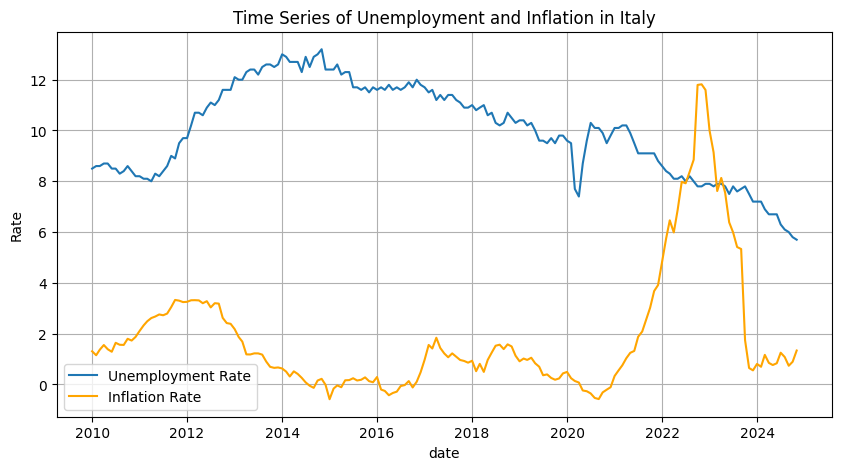

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='Unemployment', data=df, label='Unemployment Rate')
sns.lineplot(x='date', y='Inflation', data=df, label='Inflation Rate', color='orange')
plt.title("Time Series of Unemployment and Inflation in Italy")
plt.xlabel("date")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()


#### Observations:

- 2010–2013: Notice how unemployment steadily climbed, possibly reflecting post-recession fallout, while inflation fluctuated around moderate levels.
- Mid-2010s to 2019: Unemployment appears relatively high (~10–12%), yet inflation hovers near or below 2%. This suggests a period where demand wasn’t high enough to push prices up significantly.
- 2020–2022: A notable dip in unemployment early on might reflect temporary job-protection measures or data anomalies, while inflation spikes in 2022 could be tied to global supply chain disruptions.
- Recent Trends (2023–2024): Inflation rates appear to drop from historical highs but remain above pre-2020 levels; unemployment shows a gradual downward trend.

### 3.3 Scatter Plot and Correlation
Next, we examine whether there is a negative correlation (as predicted by the Phillips curve) using a scatter plot and correlation coefficient.

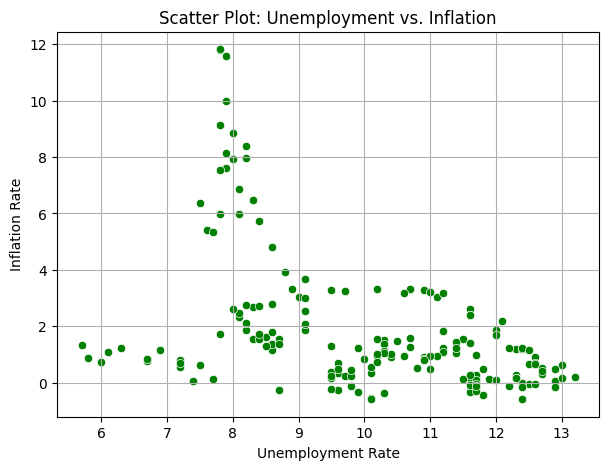

Correlation between Unemployment and Inflation: -0.457


In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Unemployment', y='Inflation', data=df, color='green')
plt.title("Scatter Plot: Unemployment vs. Inflation")
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")
plt.grid(True)
plt.show()

correlation = df['Unemployment'].corr(df['Inflation'])
print(f"Correlation between Unemployment and Inflation: {correlation:.3f}")


### Interpretation:

- the correlation is negative around -0.46, which supports the Phillips Curve theory.

## 4. Discussion of Findings
Based on the time series and scatter plot:

## Time Series Insight:

- The large inflation spike in 2022 accompanied by an eventual unemployment drop may appear to support the Phillips curve, but other factors (like global supply shocks, central bank policies, or pandemic-related measures) can distort the traditional relationship.
Correlation and Scatter Insights:

- the strong negative correlation (-0.46) suggest that inflation systematically rises when unemployment falls.

## Potential Outliers:

Points from 2022–2023 may act as outliers, with unusually high inflation not always matched by dramatically lower unemployment.

#### Key Takeaway:
The raw correlation and visual evidence may only partially confirm the Phillips curve in modern Italy. Economic policies and external shocks (e.g., COVID-19, energy price surges, etc.) can greatly impact the relationship.



# 6. Conclusion
In this notebook, we have:

- Described the background and motivation for studying the Phillips curve in the Italian context.
- Shown time-series plots highlighting key periods of high unemployment or high inflation.
- Analyzed correlation, providing a preliminary gauge of the inverse relationship’s strength (or weakness).
- While the Phillips curve remains a useful heuristic, real-world data often reveal complexities. The upcoming regression analysis will build on these findings, offering a more formal test of whether Italy’s economy adheres to (or diverges from) classical theory.